In [1]:
!pip install google-api-python-client

In [2]:
import os
import csv
from googleapiclient.discovery import build
from datetime import datetime

# Set up YouTube API credentials
API_KEY = ""#api key removed for privacy concerns
youtube = build("youtube", "v3", developerKey=API_KEY)

# Function to fetch video categories
def fetch_video_categories():
    request = youtube.videoCategories().list(
        part="snippet",
        regionCode="IN"  # For India
    )
    response = request.execute()
    return {category["id"]: category["snippet"]["title"] for category in response["items"]}

# Function to fetch trending videos with specified details
def fetch_trending_videos():
    request = youtube.videos().list(
        part="snippet,statistics",
        chart="mostPopular",
        regionCode="IN",  # For India
        maxResults=100  # Maximum number of videos to retrieve
    )
    response = request.execute()
    return response["items"]

# Function to extract relevant details from the fetched videos
def extract_video_details(videos, category_map):
    extracted_details = []

    for idx, video in enumerate(videos, start=1):
        channel_name = video["snippet"]["channelTitle"]
        video_title = video["snippet"]["title"]
        views_count = int(video["statistics"]["viewCount"])
        like_count = int(video["statistics"]["likeCount"]) if "likeCount" in video["statistics"] else 0
        comment_count = int(video["statistics"]["commentCount"]) if "commentCount" in video["statistics"] else 0
        dislike_count = int(video["statistics"]["dislikeCount"]) if "dislikeCount" in video["statistics"] else 0
        category_id = video["snippet"]["categoryId"]
        category = category_map.get(category_id, "Unknown")
        published_date = datetime.strptime(video["snippet"]["publishedAt"], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d")

        video_details = {
            "rank": idx,
            "channel_name": channel_name,
            "video_title": video_title,
            "views_count": views_count,
            "like_count": like_count,
            "comment_count": comment_count,
            "dislike_count": dislike_count,
            "category": category,
            "published_date": published_date
        }
        extracted_details.append(video_details)

    return extracted_details

# Main function to execute the data collection
def main():
    category_map = fetch_video_categories()
    trending_videos = fetch_trending_videos()
    video_details = extract_video_details(trending_videos, category_map)

    # Write data to a CSV file
    with open("trending_videos.csv", "w", newline="", encoding="utf-8") as csvfile:
        fieldnames = ["rank", "channel_name", "video_title", "views_count", "like_count", "comment_count", "dislike_count", "category", "published_date"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for video in video_details:
            writer.writerow(video)

# Entry point of the script
if __name__ == "__main__":
    main()


In [3]:
import pandas as pd
trending_videos = pd.read_csv("trending_videos.csv")

trending_videos.head()

,rank,channel_name,video_title,views_count,like_count,comment_count,dislike_count,category,published_date
0,1,T-Series,The GOAT (Official Trailer) Tamil: Thalapathy ...,24799175,1200443,56193,0,Music,2024-08-17
1,2,Sangbad Pratidin,RG Kar Doctor's Death: Exclusive Interview wit...,744240,8393,1078,0,News & Politics,2024-08-17
2,3,Harsh gujral,Akshay Kumar x Harsh Gujral | Roast Standup Co...,2296862,135660,5438,0,Comedy,2024-08-17
3,4,Triggered Insaan,Dhinchak Pooja Papa Ki Pari - Try Not To Laugh...,2360722,215393,7310,0,People & Blogs,2024-08-17
4,5,Moviebuff Tamil,Thangalaan - Sneak Peek | Chiyaan Vikram | K E...,598898,13115,506,0,Film & Animation,2024-08-17


a. How many views do our trending videos have?


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# a. Total Views
total_views = trending_videos['views_count'].sum()

print(total_views)

136170217


b. Do most of them have many views? Is having many views required for a


video to become trending?


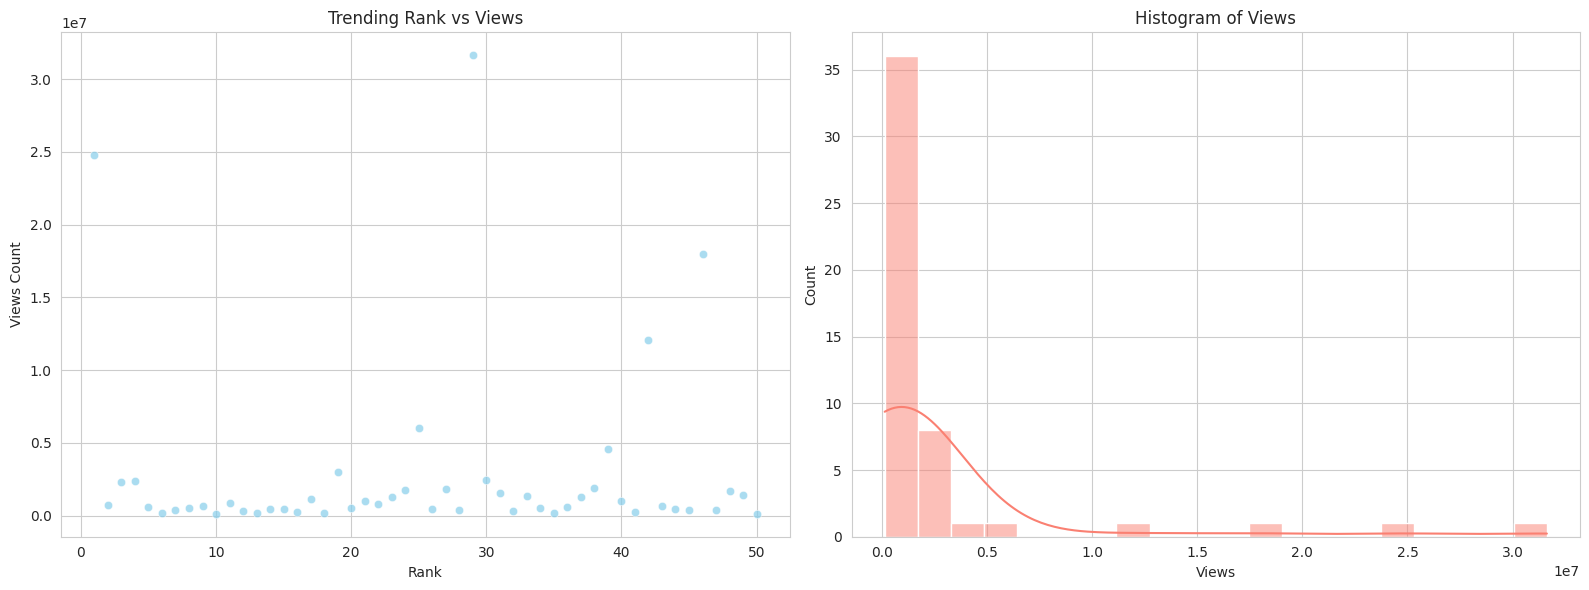

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Set the style
sns.set_style("whitegrid")

# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Rank vs Views
sns.scatterplot(ax=axes[0], x='rank', y='views_count', data=trending_videos, alpha=0.7, color='skyblue')
axes[0].set_title("Trending Rank vs Views")
axes[0].set_xlabel("Rank")
axes[0].set_ylabel("Views Count")
axes[0].grid(True)

# Histogram plot for Views
sns.histplot(ax=axes[1], data=trending_videos, x='views_count', bins=20, kde=True, color='salmon')
axes[1].set_title("Histogram of Views")
axes[1].set_xlabel("Views")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



c. The same questions above but applied to likes and comment count instead of
views.


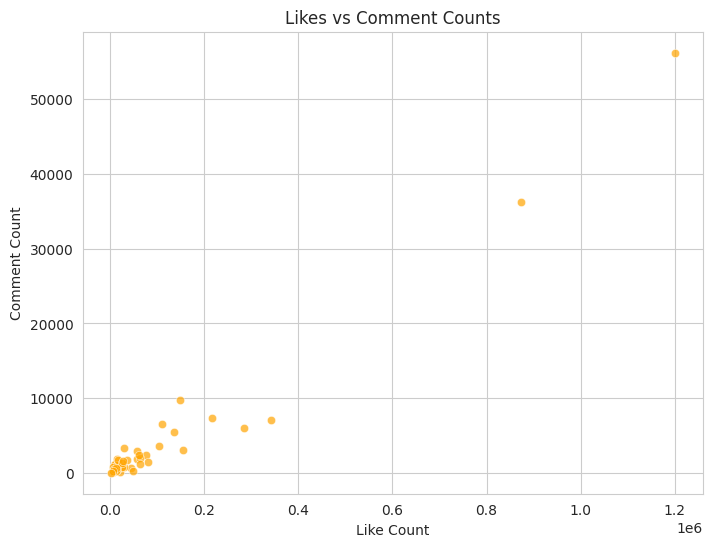

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Set the style
sns.set_style("whitegrid")

# Create a scatter plot for Likes vs Comments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=trending_videos, x='like_count', y='comment_count', alpha=0.7, color='orange')
plt.title("Likes vs Comment Counts")
plt.xlabel("Like Count")
plt.ylabel("Comment Count")
plt.grid(True)

# Show plot
plt.show()



d. Which video remained the most on the trending-videos list?


In [7]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Dictionary to store video IDs and their respective trending ranks
video_trending_ranks = {}

# Iterate over each row in the dataset
for index, row in trending_videos.iterrows():
    video_id = row["video_title"]  # Assuming "video_title" is unique for each video
    trending_rank = row["rank"]

    # Update the trending rank for the video
    if video_id in video_trending_ranks:
        video_trending_ranks[video_id] = min(video_trending_ranks[video_id], trending_rank)
    else:
        video_trending_ranks[video_id] = trending_rank

# Find the video with the lowest trending rank (longest duration on the trending list)
most_trending_video = min(video_trending_ranks, key=video_trending_ranks.get)
longest_duration = video_trending_ranks[most_trending_video]

print("The video that remained the most on the trending-videos list is:", most_trending_video)
print("It remained on the list for", longest_duration, "days.")


The video that remained the most on the trending-videos list is: The GOAT (Official Trailer) Tamil: Thalapathy Vijay | Venkat Prabhu | Yuvan Shankar Raja | T-Series
It remained on the list for 1 days.



e. How many trending videos contain a fully capitalized word in their titles?






In [8]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Function to check if a word is fully capitalized
def is_fully_capitalized(word):
    return word.isupper()

# Count the number of trending videos with fully capitalized words in their titles
count_fully_capitalized = 0
for title in trending_videos['video_title']:
    words = title.split()
    for word in words:
        if is_fully_capitalized(word):
            count_fully_capitalized += 1
            break  # Break out of inner loop if any fully capitalized word is found

print("Number of trending videos containing fully capitalized words in their titles:", count_fully_capitalized)


Number of trending videos containing fully capitalized words in their titles: 25


f.What are the lengths of trending video titles? Is this length related to
the video becoming trendy?

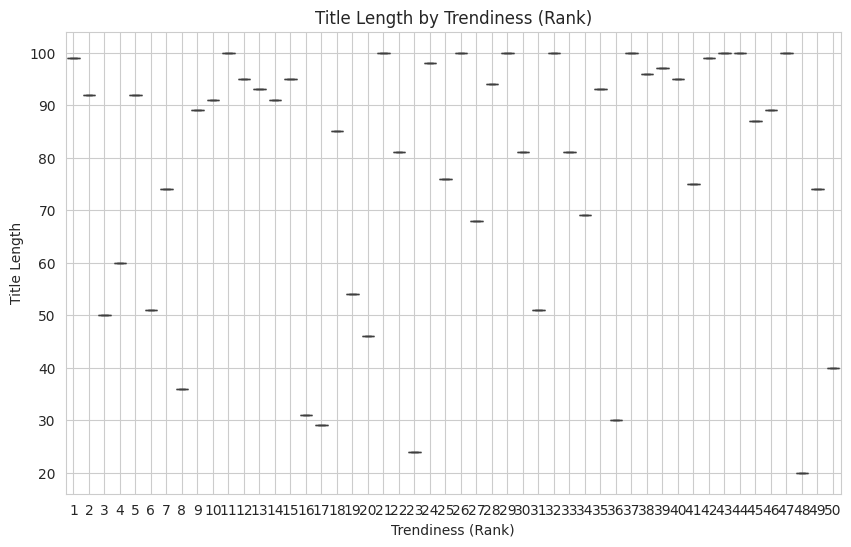

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Calculate the length of each video title
trending_videos['title_length'] = trending_videos['video_title'].apply(len)

# Set the style
sns.set_style("whitegrid")

# Create a boxplot of Title Length by Trendiness (Rank)
plt.figure(figsize=(10, 6))
sns.boxplot(x='rank', y='title_length', data=trending_videos)
plt.title("Title Length by Trendiness (Rank)")
plt.xlabel("Trendiness (Rank)")
plt.ylabel("Title Length")
plt.grid(True)

# Show plot
plt.show()


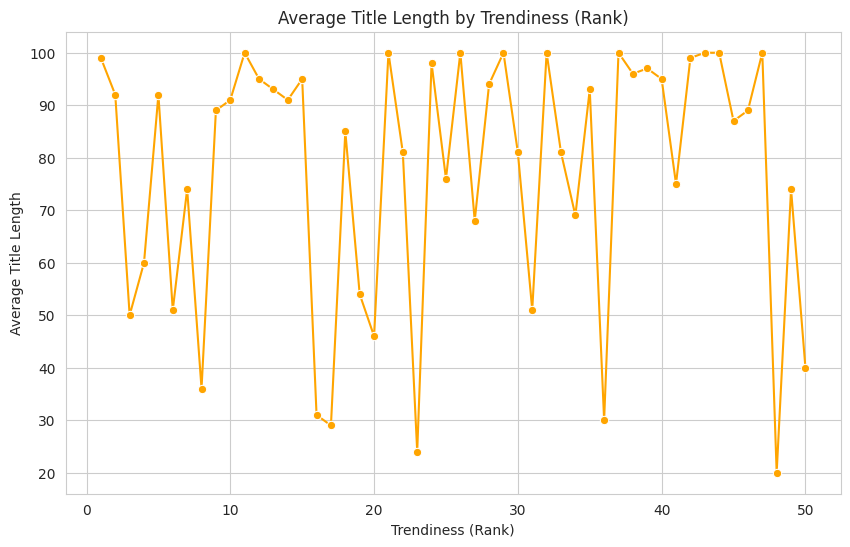

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Calculate the length of each video title
trending_videos['title_length'] = trending_videos['video_title'].apply(len)

# Calculate the average title length for each rank
avg_title_length_by_rank = trending_videos.groupby('rank')['title_length'].mean().reset_index()

# Set the style
sns.set_style("whitegrid")

# Create a line chart of Average Title Length by Trendiness (Rank)
plt.figure(figsize=(10, 6))
sns.lineplot(x='rank', y='title_length', data=avg_title_length_by_rank, marker='o', color='orange')
plt.title("Average Title Length by Trendiness (Rank)")
plt.xlabel("Trendiness (Rank)")
plt.ylabel("Average Title Length")
plt.grid(True)

# Show plot
plt.show()


How are views, likes, dislikes, comment count, title length, and other
attributes correlate with (relate to) each other? How are they
connected?

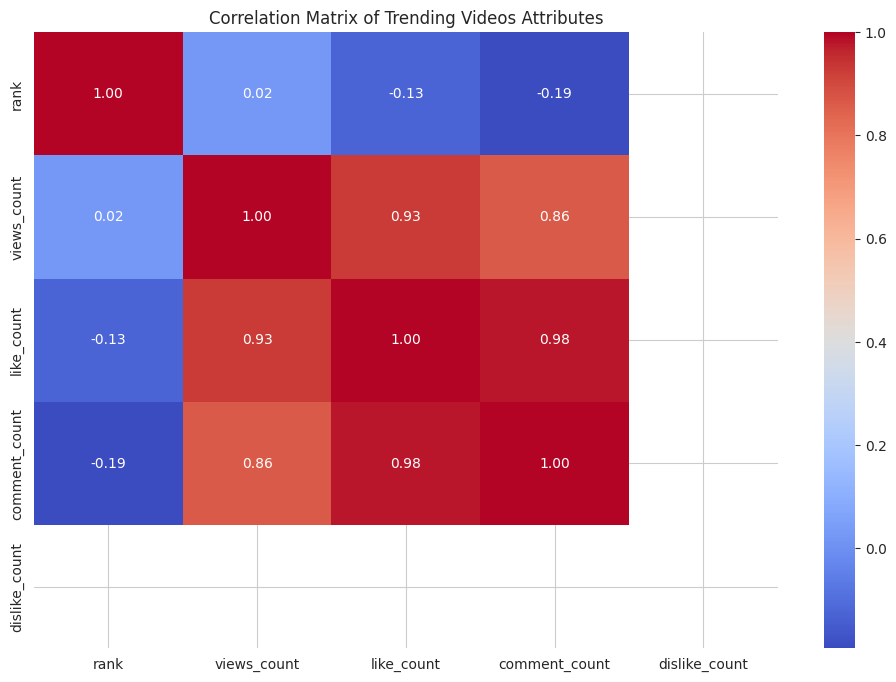

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Exclude non-numeric columns
numeric_columns = trending_videos.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title("Correlation Matrix of Trending Videos Attributes")

# Show plot
plt.show()


### h. What are the most common words in trending video titles?

In [12]:
import pandas as pd
import re
from collections import Counter

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Tokenize and count words in video titles
all_words = ' '.join(trending_videos['video_title']).lower()  # Convert to lowercase for consistency
all_words = re.findall(r'\b\w+\b', all_words)  # Tokenize and filter out non-word characters

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words

# Print the most common words
print("Most common words in trending video titles:")
for word, count in most_common_words:
    print(word)


Most common words in trending video titles:
2024
trailer
ക
ന
day
goat
official
kumar
2
south


In [13]:
import pandas as pd
from collections import Counter

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Tokenize and count words in video titles
all_words = ' '.join(trending_videos['video_title']).split()
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words

# Print the most common words
print("Most common words in trending video titles:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words in trending video titles:
|: 107
-: 24
2024: 11
Trailer: 6
Day: 6
GOAT: 5
South: 5
Thalapathy: 4
Vijay: 4
Venkat: 4


i)Which YouTube channels have the largest number of trending videos?

In [14]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Count the number of trending videos for each channel
channel_counts = trending_videos['channel_name'].value_counts()

# Get the channels with the largest number of trending videos
most_trending_channels = channel_counts.head(10)  # Change 10 to the desired number of channels

# Print the channels with the largest number of trending videos
print("Channels with the largest number of trending videos:")
print(most_trending_channels)


Channels with the largest number of trending videos:
channel_name
Saregama Tamil        2
Moviebuff Tamil       2
FanCode               2
Faisal Khan           2
tamilcinemareview     2
T-Series              1
Relare Ganga          1
Kavitha Naga Vlogs    1
Narendra Modi         1
SlayyPop              1
Name: count, dtype: int64


Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the
largest number of trending videos?

In [15]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Count the number of trending videos for each category
category_counts = trending_videos['category'].value_counts()

# Get the category with the largest number of trending videos
most_trending_category = category_counts.idxmax()

# Print the category with the largest number of trending videos
print("Category with the largest number of trending videos:", most_trending_category)


Category with the largest number of trending videos: Entertainment


K)When were trending videos published? On which days of the week? at
which times of the day?

In [16]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Convert the 'published_date' column to datetime format
trending_videos['published_date'] = pd.to_datetime(trending_videos['published_date'])

# Extract day of the week and hour of the day from the publication date
trending_videos['day_of_week'] = trending_videos['published_date'].dt.day_name()
trending_videos['hour_of_day'] = trending_videos['published_date'].dt.hour

# Count the number of trending videos published on each day of the week
day_of_week_counts = trending_videos['day_of_week'].value_counts()

# Count the number of trending videos published at each hour of the day
hour_of_day_counts = trending_videos['hour_of_day'].value_counts()

# Print the distribution of publication dates
print("Distribution of publication dates:")
print(day_of_week_counts)
print("\nDistribution of publication hours:")
print(hour_of_day_counts)


Distribution of publication dates:
day_of_week
Saturday     24
Friday       10
Thursday      9
Wednesday     3
Tuesday       2
Sunday        1
Monday        1
Name: count, dtype: int64

Distribution of publication hours:
hour_of_day
0    50
Name: count, dtype: int64


In [17]:
import pandas as pd

# Load the dataset
trending_videos = pd.read_csv("trending_videos.csv")

# Convert the 'published_date' column to datetime format
trending_videos['published_date'] = pd.to_datetime(trending_videos['published_date'])

# Extract day of the week and hour of the day from the publication date
trending_videos['day_of_week'] = trending_videos['published_date'].dt.day_name()
trending_videos['hour_of_day'] = trending_videos['published_date'].dt.hour

# Count the number of trending videos published on each day of the week
day_of_week_counts = trending_videos['day_of_week'].value_counts()

# Count the number of trending videos published at each hour of the day
hour_of_day_counts = trending_videos['hour_of_day'].value_counts()

# Find the day of the week and hour of the day with the most trending videos
most_trending_day = day_of_week_counts.idxmax()
most_trending_hour = hour_of_day_counts.idxmax()

# Print the output in the specified format
print(f"The day of the week with the most trending videos is {most_trending_day}.")
print(f"The hour of the day with the most trending videos is {most_trending_hour}:00.")


The day of the week with the most trending videos is Saturday.
The hour of the day with the most trending videos is 0:00.


## **MR Beast**

In [18]:
import os
import csv
import googleapiclient.discovery
from datetime import datetime

# Set up YouTube Data API client
api_service_name = "youtube"
api_version = "v3"
api_key = ""#api key removed for privacy concerns
youtube = googleapiclient.discovery.build(api_service_name, api_version, developerKey=api_key)

# Mr. Beast's channel ID
channel_id = "UCX6OQ3DkcsbYNE6H8uQQuVA"

# Function to retrieve videos from a channel
def get_channel_videos(channel_id):
    videos = []
    next_page_token = None
    while True:
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=50,  # Maximum results per page
            order="date",  # Order by date (latest first)
            pageToken=next_page_token
        )
        response = request.execute()
        videos += response['items']
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    return videos

# Function to format date and time
def format_date_time(date_time_str):
    date_time = datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%SZ")
    return date_time.strftime("%Y-%m-%d %H:%M:%S")

# Function to save videos to CSV file
def save_to_csv(videos, file_path):
    with open(file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        fieldnames = ['video_id', 'video_title', 'views', 'likes', 'dislikes', 'comment_count', 'category', 'published_date', 'channel_name']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for video in videos:
            video_id = video.get('id', {}).get('videoId', '')
            if not video_id:  # Skip videos without a valid videoId
                continue
            video_title = video['snippet']['title']
            published_date = format_date_time(video['snippet']['publishedAt'])
            channel_name = video['snippet']['channelTitle']
            video_details = youtube.videos().list(
                part="statistics",
                id=video_id
            ).execute()
            statistics = video_details['items'][0]['statistics']
            views = int(statistics.get('viewCount', 0))
            likes = int(statistics.get('likeCount', 0))
            dislikes = int(statistics.get('dislikeCount', 0))
            comment_count = int(statistics.get('commentCount', 0))
            category = video['snippet'].get('categoryId', '')
            writer.writerow({
                'video_id': video_id,
                'video_title': video_title,
                'views': views,
                'likes': likes,
                'dislikes': dislikes,
                'comment_count': comment_count,
                'category': category,
                'published_date': published_date,
                'channel_name': channel_name
            })

# Main function to collect data
def main():
    # Define output CSV file path
    output_file_path = "mr_beast_videos.csv"

    # Retrieve videos from Mr. Beast's channel
    videos = get_channel_videos(channel_id)

    # Save videos to CSV file
    save_to_csv(videos, output_file_path)
    print(f"Data has been saved to {output_file_path}")

if __name__ == "__main__":
    main()


Data has been saved to mr_beast_videos.csv


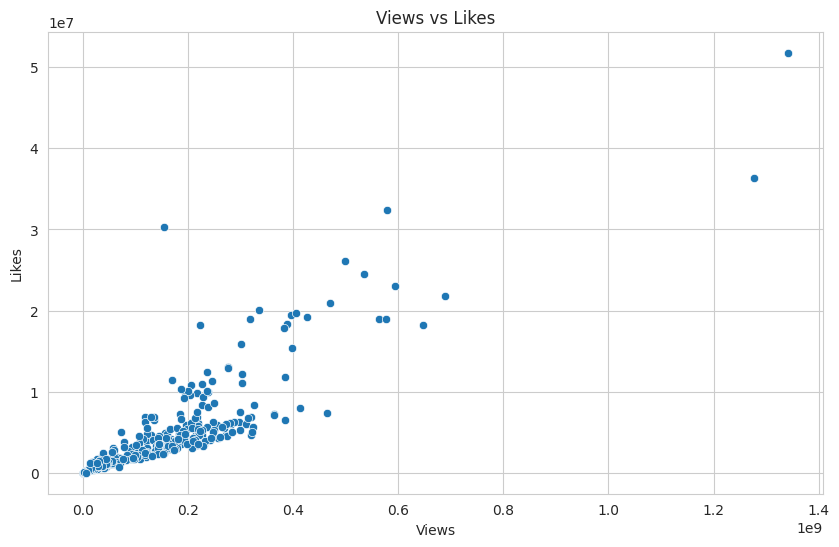

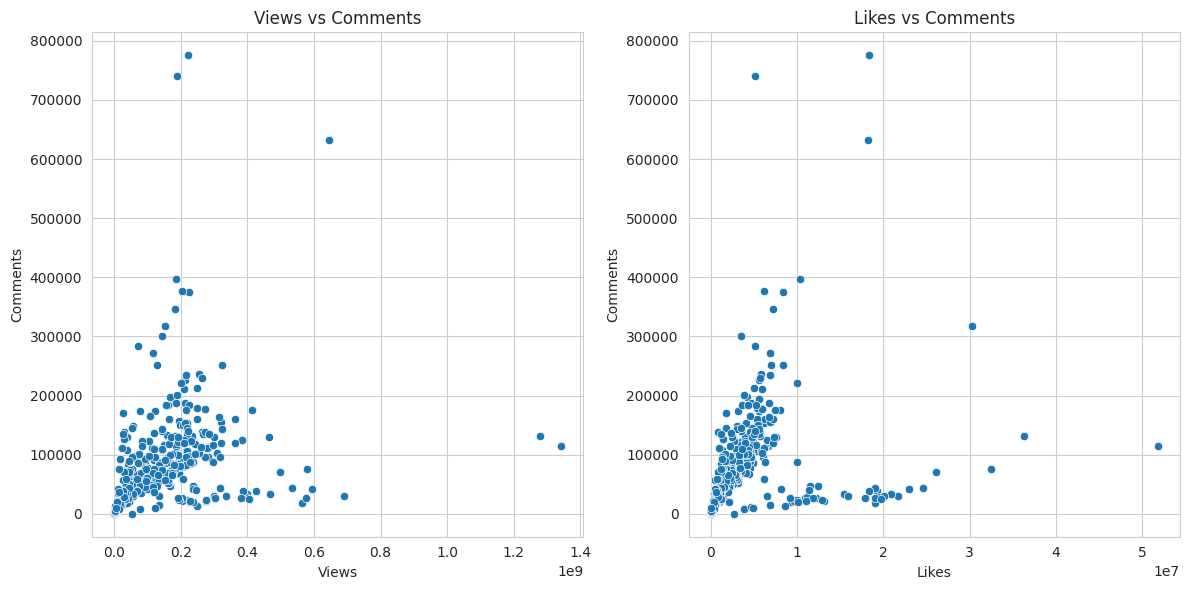

Most viewed video:
video_title    Would You Fly To Paris For A Baguette?
views                                      1341690700
Name: 78, dtype: object
Number of videos with fully capitalized words in their titles: 7


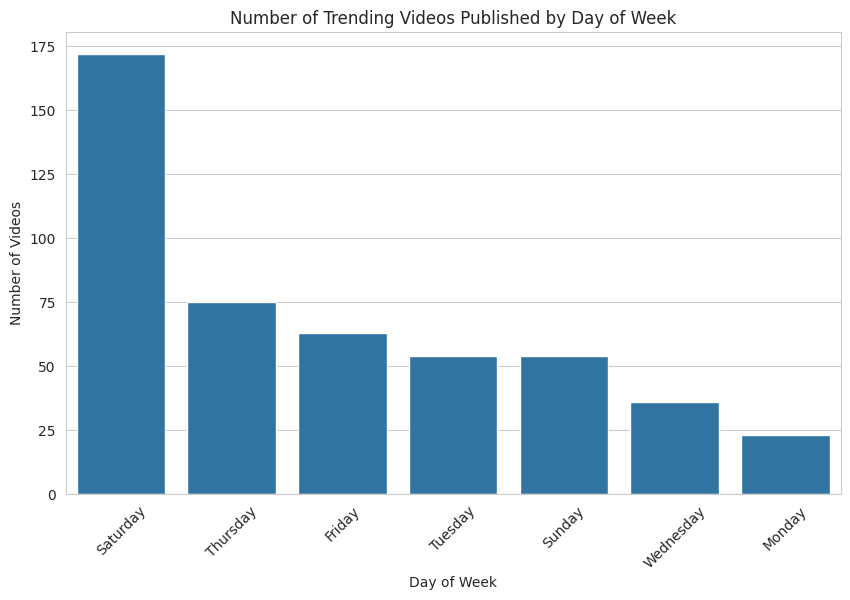

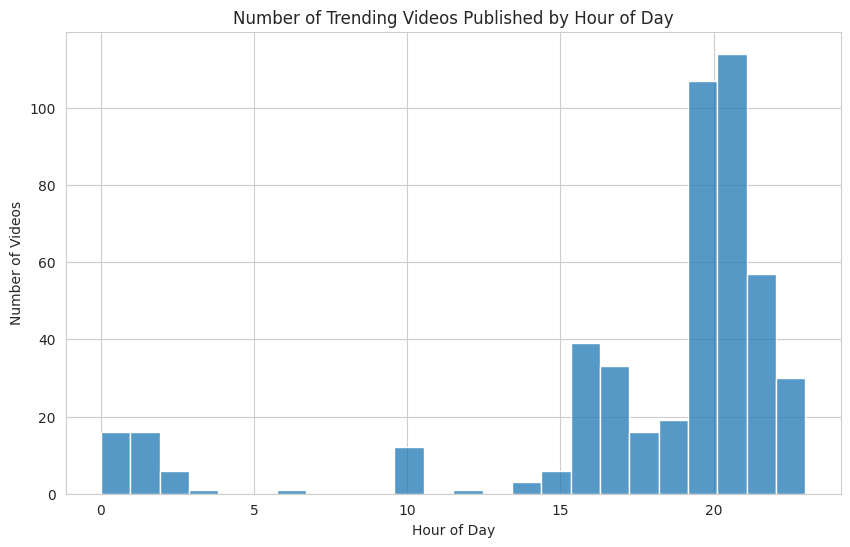

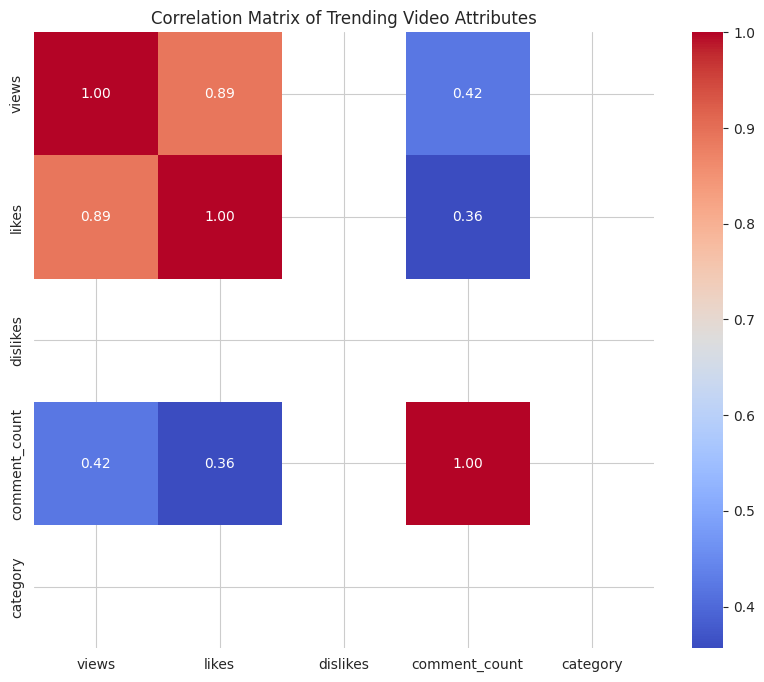

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
trending_videos = pd.read_csv("mr_beast_videos.csv")

# Drop non-numeric columns
numeric_columns = trending_videos.select_dtypes(include=['int64', 'float64']).columns
numeric_videos = trending_videos[numeric_columns]

# a) Views vs Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=trending_videos)
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

# b) Views vs Comments and c) Likes vs Comments (subplot)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='views', y='comment_count', data=trending_videos)
plt.title("Views vs Comments")
plt.xlabel("Views")
plt.ylabel("Comments")

plt.subplot(1, 2, 2)
sns.scatterplot(x='likes', y='comment_count', data=trending_videos)
plt.title("Likes vs Comments")
plt.xlabel("Likes")
plt.ylabel("Comments")

plt.tight_layout()
plt.show()

# d) Most viewed video
most_viewed_video = trending_videos.loc[trending_videos['views'].idxmax()]
print("Most viewed video:")
print(most_viewed_video[['video_title', 'views']])

# e) How many videos contain a fully capitalized word in their titles?
capitalized_words_count = sum(trending_videos['video_title'].str.isupper())
print(f"Number of videos with fully capitalized words in their titles: {capitalized_words_count}")

# f) When were videos published? On which days of the week? at which times of the day?
trending_videos['published_date'] = pd.to_datetime(trending_videos['published_date'])
trending_videos['day_of_week'] = trending_videos['published_date'].dt.day_name()
trending_videos['hour_of_day'] = trending_videos['published_date'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=trending_videos, order=trending_videos['day_of_week'].value_counts().index)
plt.title("Number of Trending Videos Published by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(trending_videos['hour_of_day'], bins=24, kde=False)
plt.title("Number of Trending Videos Published by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Videos")
plt.show()

# g) Correlation matrix for the likes comments dislikes and the views
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_videos.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Trending Video Attributes")
plt.show()
